<a href="https://colab.research.google.com/github/Alphashivesh/Embedding_cosineSimilarity/blob/main/Emdedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langchain_ollama

In [7]:
from langchain_ollama import OllamaEmbeddings
#OllamaEmbeddings is a library that is provided by langchain_ollama for creating the embeddings of the given data in string format.

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True)
!ollama pull llama3.2
!pip install ollama
!pip install langchain_ollama
import ollama

In [12]:
!ollama pull granite-embedding:30m

In [29]:
embeddings = OllamaEmbeddings(model = "granite-embedding:30m")
#granite-embedding:30m model is being used for create the embedding of the data(creating vectors of the data list of numbers), it is used for Semantic search, Clustering, Similarity comparisons, and Input to machine learning models.

docs = [
    "Ram is a good boy.",
    "Rohan used to play for 3 hours daily.",
    "Sohan used to study everytime.",
    "There is nothing but water."
]
#the documents is passed to create its embeddings, instead of it one can also pass the user defined documents or text for embeddings.

result = embeddings.embed_documents(docs)
# Generate vector embeddings for each document in the list 'docs' using the specified Ollama model

print(result)
# This will also print the result list, but in its default Python list representation.

print(str(result))
# This will print the entire result list as a single string.



[[-0.05570741, -0.044846695, 0.0033750914, 0.042767927, -0.017508727, -0.04042926, 0.006609463, -0.04352701, 0.006436419, -0.006758611, -0.0035739746, 0.044579435, -0.016030667, -0.05939626, -0.038039107, 0.04334173, 0.020336293, 0.040423583, -0.013706784, 0.077141285, 0.011947485, -0.09195432, -0.033931725, -0.0054895803, 0.008998536, -0.057753373, 0.034992196, 0.0053104023, -0.0133096725, -0.2711753, -0.019201104, -0.006234098, 0.00017406135, -0.029053017, -0.012099059, -0.040495545, 0.050850447, 0.01202194, 0.037061874, -0.011663059, -0.021745149, 0.04085125, 0.019777637, 0.041827176, 0.15984377, -0.0043527083, -0.01793555, 0.072945006, 0.0844602, -0.011175509, 0.0005168978, -0.06703289, -0.038386155, -0.025132136, -0.06885821, -0.12568493, -0.013143222, -0.056378715, -0.057176244, -0.0517656, 0.036660153, -0.042575713, -0.042101726, -0.056644976, 0.009934351, 0.03704, 0.07801013, -0.018521648, -0.017250983, 0.011222123, 0.03620753, -0.01127952, 0.04364656, 0.023519129, 0.056612633,

In [30]:
result2 = embeddings.embed_query("Rohan used to play cricket 3 hrs daily.")
print(str(result2))
print(str(result2[:10]))
print(str(result2[5:20:3]))
#creating the embedding for text data instead of docs only.

[-0.10661405, 0.0017439415, -0.017618567, 0.030491432, -0.028630083, 0.02502782, 0.00059341587, -0.0064760186, 0.020716632, -0.016883008, -0.017706158, -0.02070983, -0.01958461, -0.03440549, -0.087272525, 0.005310874, -0.023967389, 0.055113863, -0.03396745, 0.06712649, 0.0082524745, -0.054526515, -0.02048433, -0.048854962, -0.0593586, 0.005843937, -0.015343364, 0.057826784, 0.008574847, -0.13769306, -0.010617886, -0.010752559, 0.0020245095, -0.034388993, 0.05095803, -0.035876334, 0.015382091, -0.029714137, 0.049585223, -0.07288756, -0.0075650327, 0.0076793465, 0.0350124, 0.07800021, 0.100171156, 0.014399765, 0.017685402, 0.13533169, 0.0047986642, 0.030267488, -0.037783287, -0.06999446, -0.050642066, -0.014533538, -0.027352514, -0.06830267, -0.009229809, -0.029006496, 0.013932479, -0.01621059, 0.06344091, -0.051923152, 0.012829326, 0.015528644, -0.014750788, 0.019176902, 0.05526465, -0.017806204, 0.0106682815, -0.0066173975, 0.016760198, -0.022213679, -0.0053329626, -0.07964854, 0.09707

In [ ]:
# with the help of cosine-similarity finding the similarity between two differernt query of a documents.

In [51]:
# Import cosine similarity function to compute similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import numpy for numerical operations (though not used directly here)
import numpy as np

# Define a list of documents (each string describes a cricketer)
doc = [
    "Virat Kohli is a famous Indian cricketer. He is known for his aggressive batting style and has numerous records in international cricket.",
    "Sachin Tendulkar is a legendary Indian cricketer, often regarded as one of the greatest batsmen in the history of cricket. He has scored over 100 international centuries.",
    "Rohit Sharma is the captain of the Indian cricket team and is known for his elegant batting style. He has scored multiple double centuries in One Day Internationals.",
    "MS Dhoni is a former captain of the Indian cricket team and is known for his calm demeanor and finishing abilities in matches.",
    "Ravindra Jadeja is an all-rounder in the Indian cricket team, known for his exceptional fielding and left-arm spin bowling.",
    "Bhuvneshwar Kumar is a fast bowler for the Indian cricket team, known for his swing bowling and ability to bowl in the death overs.",
    "Jasprit Bumrah is a fast bowler known for his unique bowling action and ability to bowl yorkers at will. He is a key player in the Indian cricket team.",
    "Hardik Pandya is an all-rounder known for his explosive batting and fast bowling. He plays a crucial role in the Indian cricket team.",
    "Rahul Dravid is one of the finest player of test cricket in India. He is known for his defensive batting against world fastest bowler.",
    "KL Rahul is a versatile batsman who can play in various formats of the game. He has been a consistent performer for the Indian cricket team."
]

# Define the query string whose related document we want to find
query = "Tell me about Rohit Sharma?"

# Load the Ollama embedding model (granite-embedding:30m) for converting text to vector embeddings
embeddings = OllamaEmbeddings(model="granite-embedding:30m")

# Generate embeddings for all documents (returns a list of embedding vectors)
doc_embeddings = embeddings.embed_documents(doc)

# Generate embedding for the query
query_embeddings = embeddings.embed_query(query)

# Compute cosine similarity between query embedding and all document embeddings
similarity_scores = cosine_similarity([query_embeddings], doc_embeddings)

# Find the index and score of the most similar document (highest cosine similarity)
index, score = sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1])[-1]
"""
1. **`similarity_scores[0]`**
   ➤ Extracts the list of similarity scores between the query and each document.
   **Conclusion:** You now have how similar each document is to the query.

2. **`enumerate(similarity_scores[0])`**
   ➤ Pairs each similarity score with its corresponding document index.
   **Conclusion:** Now you can track *which document* each score belongs to.

3. **`list(...)`**
   ➤ Converts the enumerated object to a list so it can be sorted.
   **Conclusion:** Prepares the data structure for sorting.

4. **`sorted(..., key=lambda x: x[1])`**
   ➤ Sorts the (index, score) pairs by similarity score (ascending order).
   **Conclusion:** Helps you identify which documents are more similar than others.

5. **`[-1]`**
   ➤ Selects the last (index, score) pair — which has the **highest similarity score**.
   **Conclusion:** You now have the *most relevant* document’s index and score.

6. **`index, score = ...`**
   ➤ Unpacks the selected tuple into two variables:

   * `index` → the best-matching document’s position
   * `score` → how well it matches the query
     **Conclusion:** These two values are used to retrieve and display the most relevant document.
"""

#printing the similarity scores for each of the query of the documents.
print(similarity_scores)

# Print the query text
print(query)

# Print the most similar document from the list
print(doc[index])

# Print the similarity score (between 0 and 1)
print(score)


[[0.66731149 0.64898135 0.87791928 0.6581287  0.62900582 0.63579614
  0.67832325 0.63028482 0.68486549 0.6605448 ]]
Tell me about Rohit Sharma?
Rohit Sharma is the captain of the Indian cricket team and is known for his elegant batting style. He has scored multiple double centuries in One Day Internationals.
0.8779192801667213


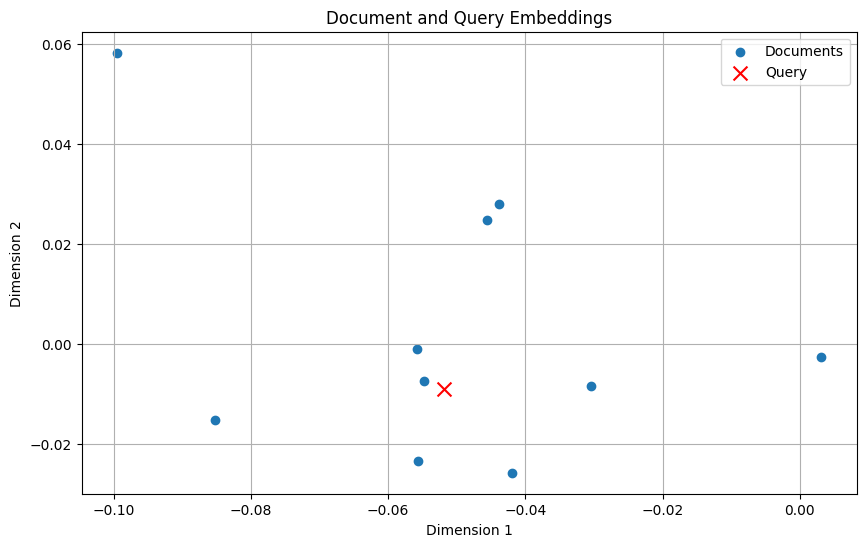

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays
doc_embeddings_np = np.array(doc_embeddings)
query_embeddings_np = np.array(query_embeddings)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(doc_embeddings_np[:, 0], doc_embeddings_np[:, 1], label='Documents', alpha=1.0)
plt.scatter(query_embeddings_np[0], query_embeddings_np[1], color='red', label='Query', marker='x', s=100)
plt.title('Document and Query Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid()
plt.show()
